# UBER DATASET

### Name: Moustafa Ayman Moustafa

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Dataset.
df = pd.read_csv('UberDataset.csv')

In [3]:
# Check the number of rows and columns.
df.shape

(1156, 7)

In [4]:
# Identify the data types of each column.
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [5]:
# Check first 5 rows.
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [6]:
# Check missing values.
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [7]:
# Handle NULL values.
df.fillna(df.mode().iloc[0], inplace=True)

In [8]:
# Check missing values again if there is remaining or not.
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [9]:
# Check for duplicates.
df.duplicated().sum()

1

In [10]:
# Remove duplicates.
df = df.drop_duplicates()

In [11]:
# Basic statistics
df.describe()

,MILES
count,1155.000000
mean,21.125108
std,359.454497
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [12]:
# Count the occurrences of each purpose
purpose_counts = df['PURPOSE'].value_counts()

C:\Users\Pc\AppData\Local\Temp\ipykernel_21240\2850606253.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purpose_counts.index, y=purpose_counts.values, palette='viridis')


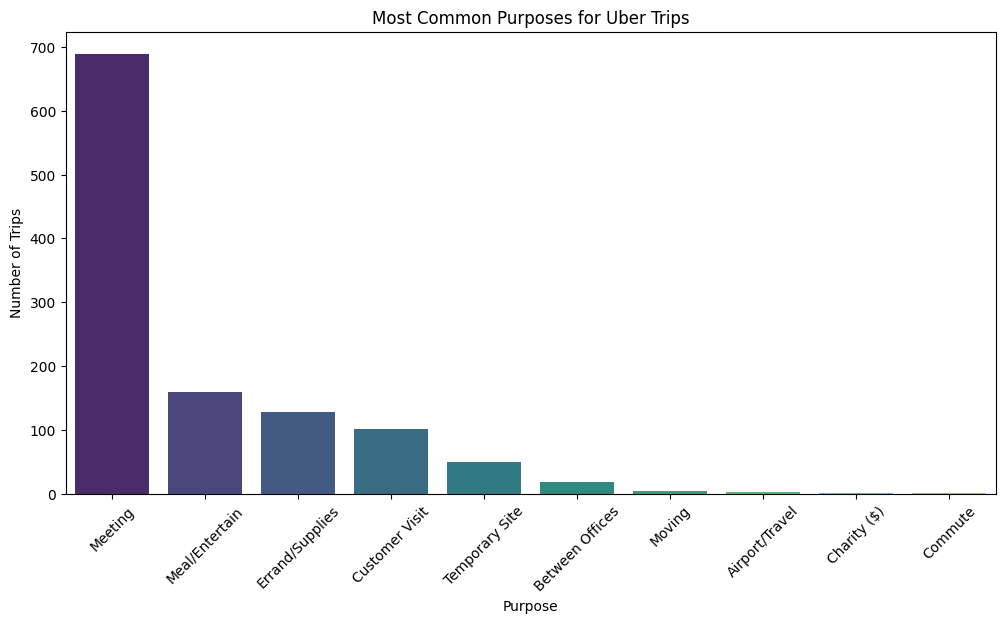

In [13]:
# Plotting the most common purposes
plt.figure(figsize=(12, 6))
sns.barplot(x=purpose_counts.index, y=purpose_counts.values, palette='viridis')
plt.title('Most Common Purposes for Uber Trips')
plt.xlabel('Purpose')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Convert 'START DATE' and 'END DATE' columns to datetime format with specific format
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce', infer_datetime_format=True)
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce', infer_datetime_format=True)

C:\Users\Pc\AppData\Local\Temp\ipykernel_21240\3551050948.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce', infer_datetime_format=True)
C:\Users\Pc\AppData\Local\Temp\ipykernel_21240\3551050948.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce', infer_datetime_format=True)


In [15]:
# Extract hour from START_DATE
df['HOUR'] = df['START_DATE'].dt.hour

In [16]:
# Group by purpose and hour to get average mileage
mileage_trends = df.groupby(['PURPOSE', 'HOUR'])['MILES'].mean().reset_index()

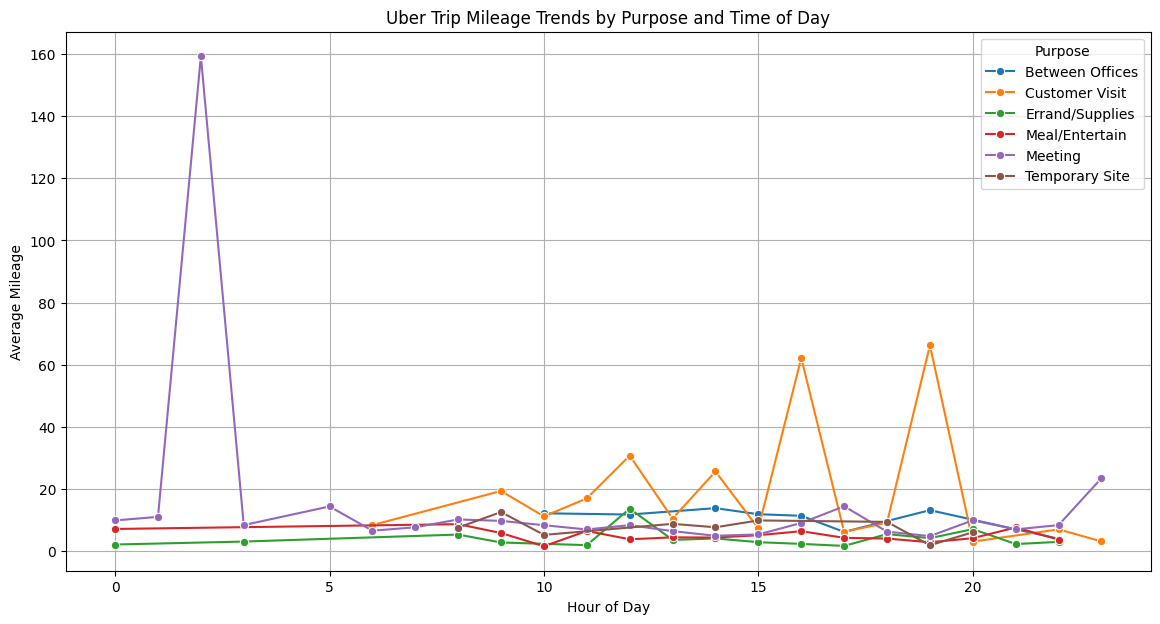

In [17]:
# Plotting mileage trends
plt.figure(figsize=(14, 7))
sns.lineplot(data=mileage_trends, x='HOUR', y='MILES', hue='PURPOSE', marker='o')
plt.title('Uber Trip Mileage Trends by Purpose and Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Mileage')
plt.legend(title='Purpose')
plt.grid()
plt.show()

In [18]:
# Create a new DataFrame for trip lengths
trip_lengths = df.groupby('CATEGORY')['MILES'].describe()

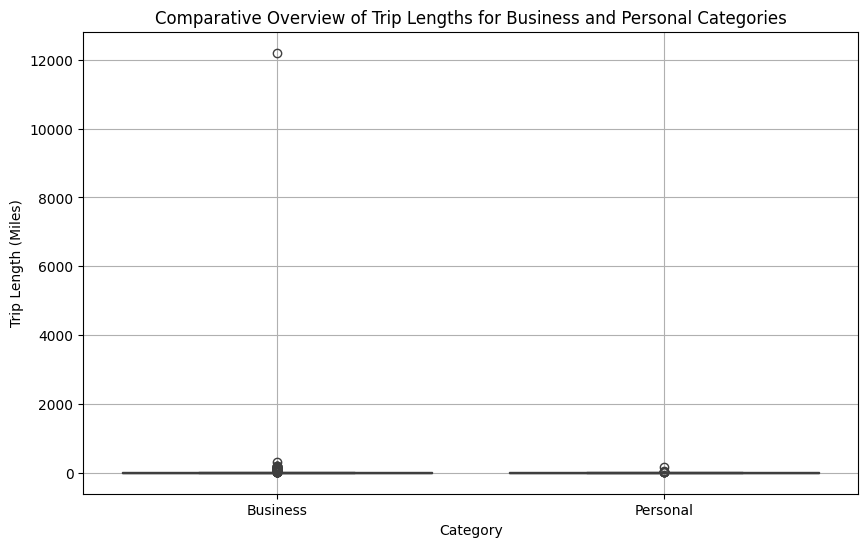

In [19]:
# Plotting the comparative overview
plt.figure(figsize=(10, 6))
sns.boxplot(x='CATEGORY', y='MILES', data=df)
plt.title('Comparative Overview of Trip Lengths for Business and Personal Categories')
plt.xlabel('Category')
plt.ylabel('Trip Length (Miles)')
plt.grid()
plt.show()

In [20]:
# Extract additional features
df['HOUR'] = df['START_DATE'].dt.hour
df['DAY'] = df['START_DATE'].dt.day_name()
df['MONTH'] = df['START_DATE'].dt.month_name()

C:\Users\Pc\AppData\Local\Temp\ipykernel_21240\4166001328.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trip_frequency.index, y=trip_frequency.values, palette='viridis')


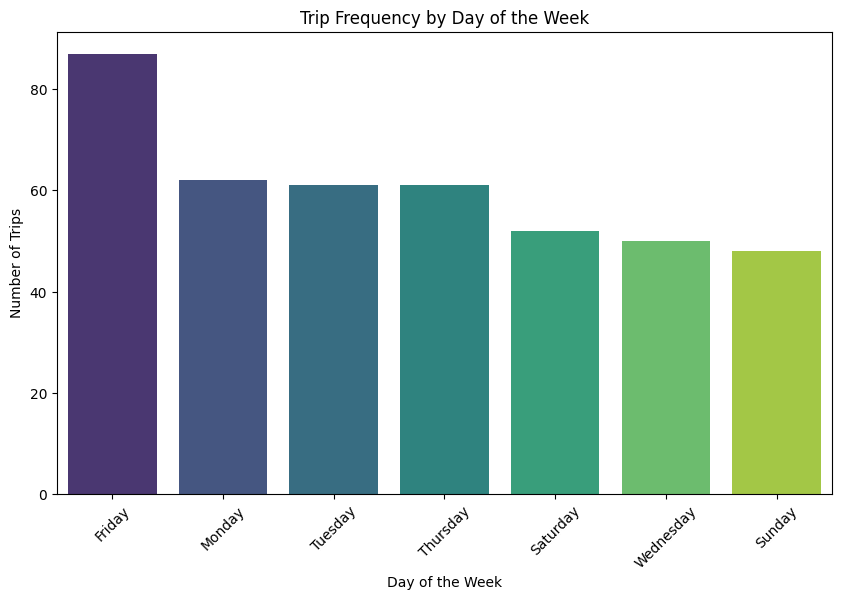

In [21]:
# Dashboard 1 - Trip Frequency by Day
plt.figure(figsize=(10, 6))
trip_frequency = df['DAY'].value_counts()
sns.barplot(x=trip_frequency.index, y=trip_frequency.values, palette='viridis')
plt.title('Trip Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

C:\Users\Pc\AppData\Local\Temp\ipykernel_21240\1910427052.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_duration.index, y=avg_duration.values, palette='viridis')


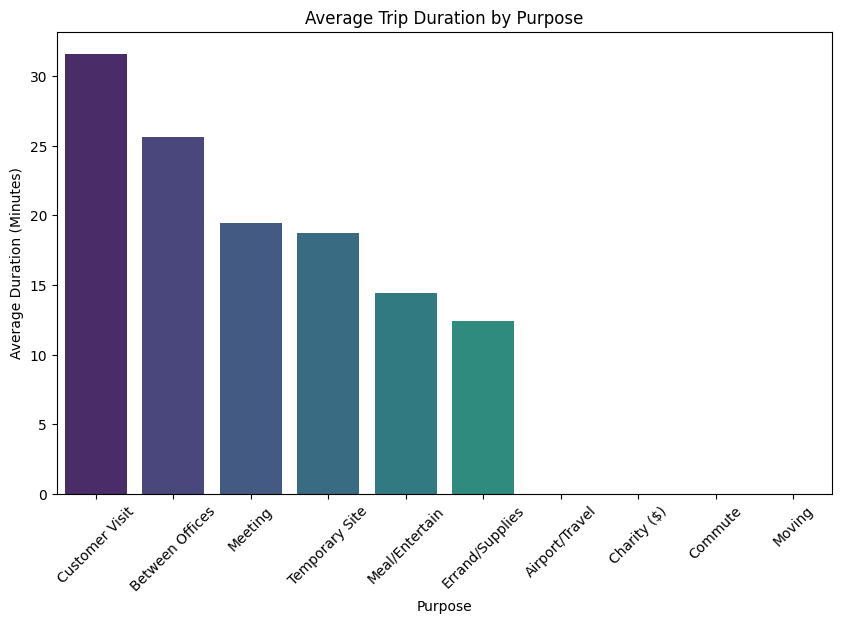

In [22]:
# Dashboard 2 - Average Trip Duration
df['DURATION'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60  # Duration in minutes
avg_duration = df.groupby('PURPOSE')['DURATION'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_duration.index, y=avg_duration.values, palette='viridis')
plt.title('Average Trip Duration by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Average Duration (Minutes)')
plt.xticks(rotation=45)
plt.show()

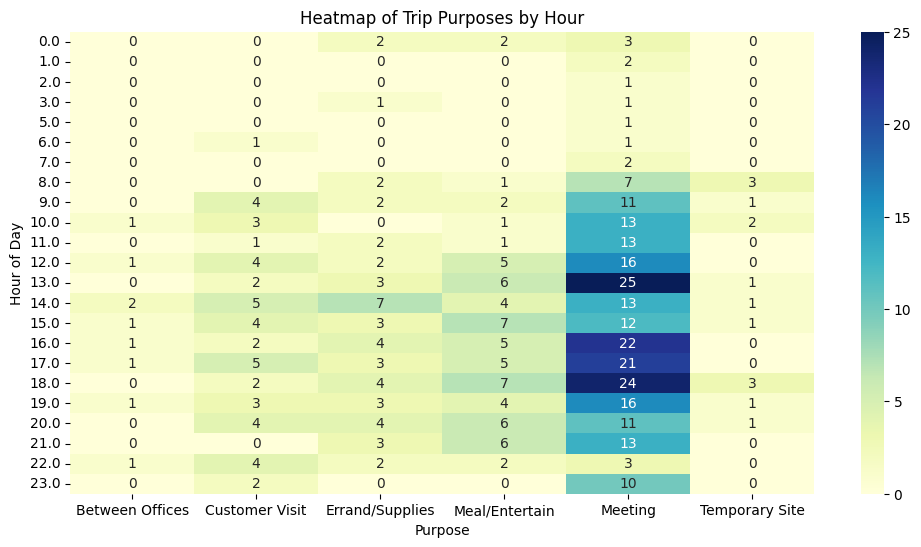

In [23]:
# Dashboard 3 - Heatmap of Trip Purposes by Hour
heatmap_data = df.pivot_table(index='HOUR', columns='PURPOSE', values='MILES', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Trip Purposes by Hour')
plt.xlabel('Purpose')
plt.ylabel('Hour of Day')
plt.show()

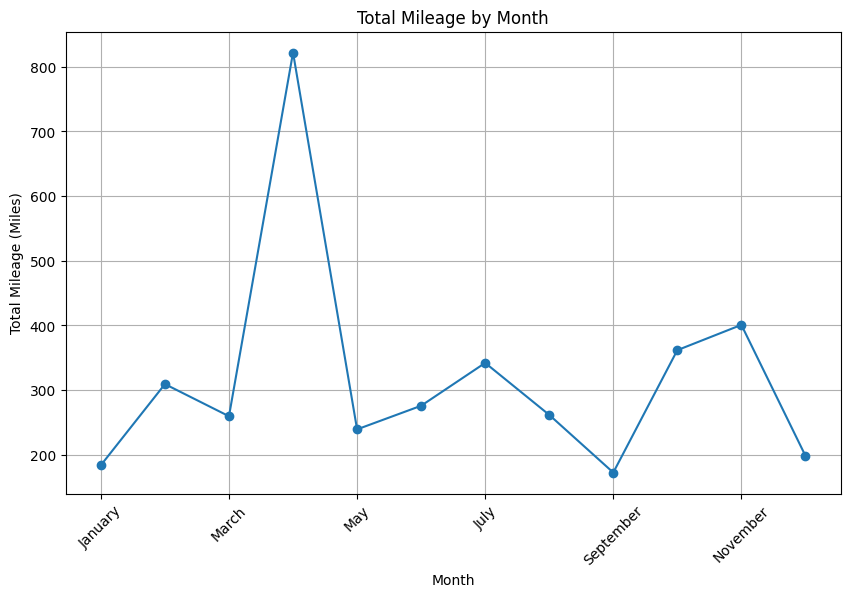

In [24]:
# Dashboard 4 - Total Mileage by Month
monthly_mileage = df.groupby('MONTH')['MILES'].sum().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.figure(figsize=(10, 6))
monthly_mileage.plot(kind='line', marker='o')
plt.title('Total Mileage by Month')
plt.xlabel('Month')
plt.ylabel('Total Mileage (Miles)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

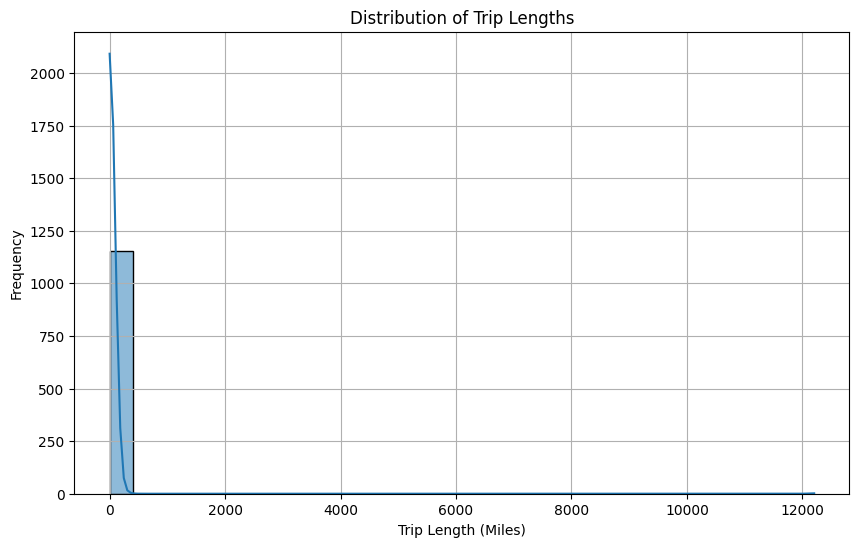

In [25]:
# Dashboard 5 - Distribution of Trip Lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['MILES'], bins=30, kde=True)
plt.title('Distribution of Trip Lengths')
plt.xlabel('Trip Length (Miles)')
plt.ylabel('Frequency')
plt.grid()
plt.show()